In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from SBS import SBS
import numpy as np
sns.set()

In [2]:
from sklearn.base import clone
from sklearn.metrics import accuracy_score
from collections import OrderedDict
import operator
from sklearn.model_selection import train_test_split


In [3]:
df_wine = pd.read_csv('wine.data',header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
X = df_wine.iloc[:,1:]
y = df_wine.iloc[:,[0]]

In [5]:
X_train, X_test,y_train, y_test = train_test_split(X,y,random_state=0,stratify =y,test_size=0.3)

In [6]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
X_train_std=pd.DataFrame(X_train_std,columns=df_wine.columns[1:])
X_test_std=pd.DataFrame(X_test_std,columns=df_wine.columns[1:])

In [7]:
print(y_train['Class label'].value_counts(normalize =True))
print(y_test['Class label'].value_counts(normalize = True))

2    0.403226
1    0.330645
3    0.266129
Name: Class label, dtype: float64
2    0.388889
1    0.333333
3    0.277778
Name: Class label, dtype: float64


[Text(0,0.5,'Percent')]

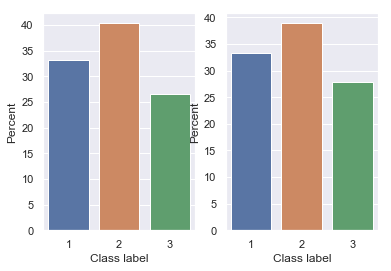

In [8]:
plt.subplot(1, 2, 1)
x = y_train['Class label']
percentage = lambda i: len(i) / float(len(x)) * 100
ax = sns.barplot(x=x, y=x,  estimator=percentage)
ax.set(ylabel="Percent")

plt.subplot(1, 2, 2)
x = y_test['Class label']
percentage = lambda i: len(i) / float(len(x)) * 100
ax = sns.barplot(x=x, y=x,  estimator=percentage)
ax.set(ylabel="Percent")

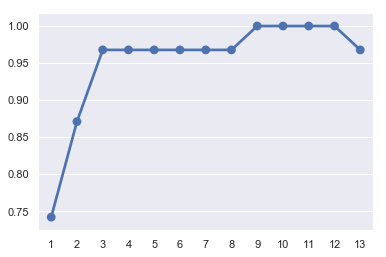

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn,k_features=1)
sbs.fit(X_train_std,y_train)
x_plot = np.array([len(x) for x in sbs.od_set_attributes.keys()])
y_plot = np.array([x for x in sbs.od_set_attributes.values()])
sns.pointplot(x=x_plot,y=y_plot)